In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import mytk # My toolkit
import acquire


## Using your store items data:



In [3]:
df = acquire.wrangle_zgulde()

In [4]:
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


### 1. Convert date column to datetime format.


In [5]:
d = df.sample(10)
pd.to_datetime(d.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

128365   2014-06-30 00:00:00+00:00
646735   2013-11-28 00:00:00+00:00
877733   2016-06-07 00:00:00+00:00
578081   2015-12-02 00:00:00+00:00
825806   2014-03-31 00:00:00+00:00
520944   2014-06-19 00:00:00+00:00
808555   2017-01-03 00:00:00+00:00
139582   2015-03-18 00:00:00+00:00
727500   2015-01-23 00:00:00+00:00
106357   2014-03-26 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, GMT]

In [6]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

In [7]:
df.sale_date.dtype

datetime64[ns, GMT]

### 2. Plot the distribution of `sale_amount` and `item_price`.


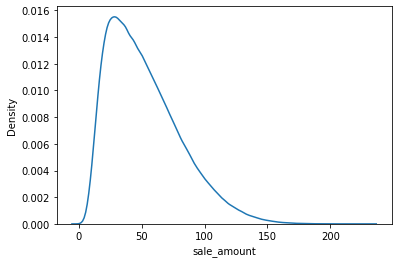

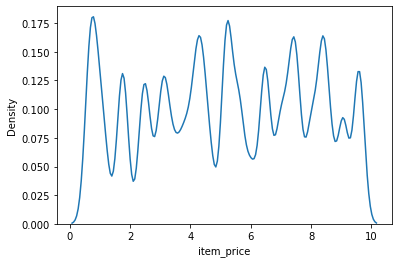

In [8]:
sns.kdeplot(df.sale_amount)
plt.show()
sns.kdeplot(df.item_price)
plt.show()


### 3. Set the index to be the datetime variable.


In [9]:
df = df.set_index('sale_date')
df= df.sort_index()
df.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221


### 4. Add a 'month' and 'day of week' column to your dataframe.


In [11]:
df['month'] = df.index.month

In [13]:
df['day_of_week'] = df.index.day_of_week

### 5. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.


In [15]:
df['sales_total'] = df.sale_amount * df.item_price

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [16]:
def clean_zgulde(df):
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    df = df.set_index('sale_date')
    df= df.sort_index()
    df['month'] = df.index.month
    df['day_of_week'] = df.index.day_of_week
    df['sales_total'] = df.sale_amount * df.item_price
    return df
    

In [17]:
df = acquire.wrangle_zgulde()
df = clean_zgulde(df)
df.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,1,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,1,1,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,1,1,294.00


## Using the OPS data acquired in the Acquire exercises `opsd_germany_daily.csv`, complete the following:



In [20]:
df = acquire.wrangle_power()

df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [21]:
mytk.col_summary(df)

,dtype,null_sum,null_mean,hidden_nulls,n_unique,duplicates
Date,object,0,0.000000,0,4383,0
Consumption,float64,0,0.000000,0,4374,9
Wind,float64,1463,0.333790,0,2913,1470
Solar,float64,2195,0.500799,0,2185,2198
Wind+Solar,float64,2196,0.501027,0,2185,2198


In [23]:
df.columns = [mytk.clean(col) for col in df]
df.columns

Index(['date', 'consumption', 'wind', 'solar', 'wind_solar'], dtype='object')

### 1. Convert date column to datetime format.


In [24]:
df.date = pd.to_datetime(df.date)

### 2. Plot the distribution of each of your variables.


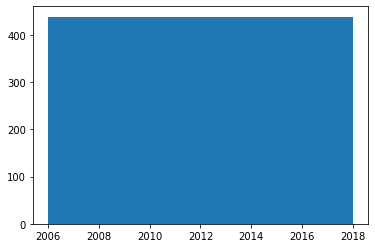

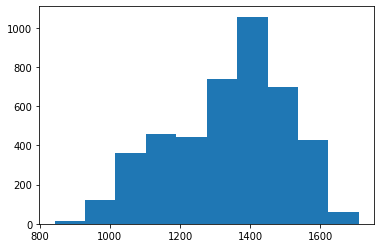

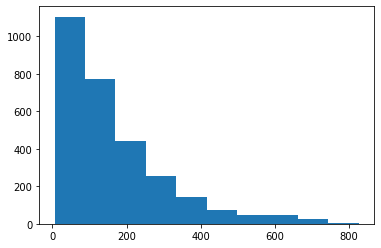

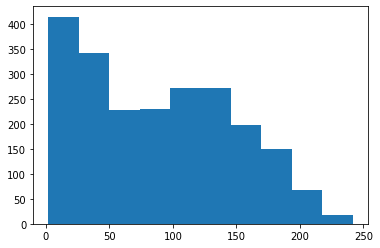

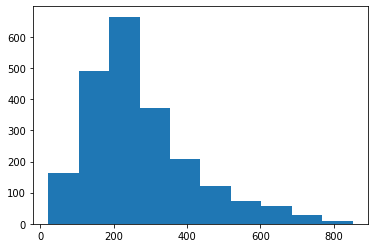

In [27]:
for col in df:
    plt.hist(df[col])
    plt.show()

### 3. Set the index to be the datetime variable.


In [30]:
df = df.set_index('date')

### 4. Add a month and a year column to your dataframe.


In [31]:
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


### 5. Fill any missing values.


In [35]:
df = df.fillna(0)

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [2]:
df = acquire.wrangle_power()
df.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0
